In [2]:

pip install matplotlib

In [1]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
fash = keras.datasets.fashion_mnist

(train_img, train_lab), (test_img, test_lab) = fash.load_data()

In [3]:
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [4]:
train_img.shape

(60000, 28, 28)

In [5]:
len(train_lab)

60000

In [6]:
train_lab

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_img.shape

(10000, 28, 28)

In [8]:
len(test_lab)

10000

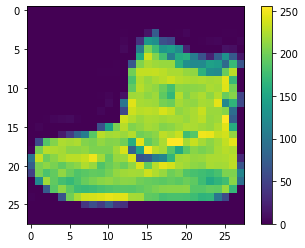

In [9]:
plt.figure()
plt.imshow(train_img[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_img = train_img / 255.0
test_img = test_img /255.0

In [11]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),keras.layers.Dense(128, activation='relu'),keras.layers.Dense(10)])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
#starts training
model.fit(train_img,train_lab,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4999 - accuracy: 0.8251
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3770 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3375 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3154 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2971 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2821 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2704 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2585 - accuracy: 0.9030
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2479 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.239

In [14]:
test_loss, test_acc = model.evaluate(test_img, test_lab, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3462 - accuracy: 0.8756

Test accuracy: 0.8755999803543091


In [15]:
#predictions making
predit = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [16]:
pre = predit.predict(test_img)

In [17]:
pre[0]

array([6.9457506e-08, 2.2468998e-09, 1.3567899e-07, 1.3732253e-08,
       1.9976385e-08, 1.7286012e-04, 1.4367527e-06, 1.5050085e-02,
       1.3484801e-07, 9.8477525e-01], dtype=float32)

In [22]:
img = test_img[1]


In [23]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [25]:
pre_single = predit.predict(img)

In [26]:
np.argmax(pre_single[0])

2